# Dataset

In [1]:
DATASET_PATH = '/kaggle/input/aug-oai-capitulo3'

# Análisis del Conjunto de Datos



## Distribución General

El dataset contiene un **total de 9,786 imágenes** distribuidas en las siguientes clases:

| **Clase** | **Cantidad de Imágenes** | **Porcentaje** |
|----------|----------------------|--------------|
| **Clase 0** | 3,857 | 39.41% |
| **Clase 1** | 1,770 | 18.09% |
| **Clase 2** | 2,578 | 26.34% |
| **Clase 3** | 1,286 | 13.14% |
| **Clase 4** | 295 | 3.01% |



## División del Conjunto de Datos

Para el entrenamiento y evaluación del modelo, se realizó una división del conjunto de datos con las siguientes proporciones:
- **Entrenamiento (Train)**: 75%
- **Prueba (Test)**: 17%
- **Validación (Val)**: 8%



### Conjunto de Entrenamiento (Train)
**Total**: 7,337 imágenes (74.97% del dataset)

| **Clase** | **Cantidad** | **Porcentaje dentro del conjunto** |
|-----------|-------------|----------------------------------|
| **Clase 0** | 2,892 | 39.42% |
| **Clase 1** | 1,327 | 18.09% |
| **Clase 2** | 1,933 | 26.35% |
| **Clase 3** | 964 | 13.14% |
| **Clase 4** | 221 | 3.01% |



### Conjunto de Prueba (Test)
**Total**: 1,669 imágenes (17.05% del dataset)

| **Clase** | **Cantidad** | **Porcentaje dentro del conjunto** |
|-----------|-------------|----------------------------------|
| **Clase 0** | 657 | 39.36% |
| **Clase 1** | 302 | 18.09% |
| **Clase 2** | 439 | 26.30% |
| **Clase 3** | 220 | 13.18% |
| **Clase 4** | 51 | 3.06% |



### Conjunto de Validación (Val)
**Total**: 780 imágenes (7.97% del dataset)

| **Clase** | **Cantidad** | **Porcentaje dentro del conjunto** |
|-----------|-------------|----------------------------------|
| **Clase 0** | 308 | 39.49% |
| **Clase 1** | 141 | 18.08% |
| **Clase 2** | 206 | 26.41% |
| **Clase 3** | 102 | 13.08% |
| **Clase 4** | 23 | 2.95% |


In [99]:
import os

imagenes = {}
for subset in os.listdir(DATASET_PATH):
    subset_path = os.path.join(DATASET_PATH, subset)
    for kl_grade in os.listdir(subset_path):
        kl_grade_path = os.path.join(subset_path, kl_grade)
        for image in os.listdir(kl_grade_path):
            image_path = os.path.join(kl_grade_path, image)
            if kl_grade not in imagenes:
                imagenes[kl_grade] = 0
            imagenes[kl_grade] += 1

print(f"Total imagenes: {sum(imagenes.values())}")
for kl_grade, count in imagenes.items():
    print(f"Clase {kl_grade}: {count} \t {count/sum(imagenes.values())*100:.2f}%")

Total imagenes: 9786
Clase 0: 3857 	 39.41%
Clase 1: 1770 	 18.09%
Clase 2: 2578 	 26.34%
Clase 3: 1286 	 13.14%
Clase 4: 295 	 3.01%


### Comprobar imagenes repetidas 

In [18]:
import cv2
import hashlib
hashes = []
duplicates = 0

for split in os.listdir(DATASET_PATH):
    split_path = os.path.join(DATASET_PATH, split)
    print("Analizando split ", split)
    for kl_grade in os.listdir(split_path):
        kl_grade_path = os.path.join(split_path, kl_grade)
        for image in os.listdir(kl_grade_path):
            image_path = os.path.join(kl_grade_path, image)
            img = cv2.imread(image_path)
            if img is None:
                print(f"Error al cargar {image_path}")
                continue
            hash = hashlib.md5(img.tobytes()).hexdigest()
            if hash in hashes:
                print(f"Imagen duplicada: {image_path} y {hashes[hash]}")
                duplicates += 1
            else:
                hashes.append(hash)
print(duplicates)

Analizando split  auto_test
Analizando split  test
Analizando split  train
Analizando split  val
0


### Unificar todas las imagenes el en mismo directorio

In [21]:
UNIFIED_DATASET_PATH = 'dataset/mendeleyOAI_dataset/ClsKLData/kneeKL224_unified'

import shutil
os.makedirs(UNIFIED_DATASET_PATH, exist_ok=True)
for split in os.listdir(DATASET_PATH):
    split_path = os.path.join(DATASET_PATH, split)
    print("Copiando split ", split, end="")
    for kl_grade in os.listdir(split_path):
        print(".", end="")
        os.makedirs(os.path.join(UNIFIED_DATASET_PATH, kl_grade), exist_ok=True)
        kl_grade_path = os.path.join(split_path, kl_grade)
        for image in os.listdir(kl_grade_path):
            image_path = os.path.join(kl_grade_path, image)
            shutil.copy(image_path, os.path.join(UNIFIED_DATASET_PATH, kl_grade, image))
    print()



Copiando split  auto_test.....
Copiando split  test.....
Copiando split  train.....
Copiando split  val.....


In [98]:
import os
imagenes = {}
for kl_grade in os.listdir(UNIFIED_DATASET_PATH):
    kl_grade_path = os.path.join(UNIFIED_DATASET_PATH, kl_grade)
    for image in os.listdir(kl_grade_path):
        image_path = os.path.join(kl_grade_path, image)
        if kl_grade not in imagenes:
            imagenes[kl_grade] = 0
        imagenes[kl_grade] += 1

print(f"Total imagenes: {sum(imagenes.values())}")
for kl_grade, count in imagenes.items():
    print(f"Clase {kl_grade}: {count} \t {count/sum(imagenes.values())*100:.2f}%")

Total imagenes: 9786
Clase 0: 3857 	 39.41%
Clase 1: 1770 	 18.09%
Clase 2: 2578 	 26.34%
Clase 3: 1286 	 13.14%
Clase 4: 295 	 3.01%


### División de Datos
- **Entrenamiento (train):** 75%
- **Validación (val):** 17%
- **Prueba (test):** 8%

In [121]:
import random
from src.config import RANDOM_SEED
random.seed(RANDOM_SEED)

train_ratio = 0.75
val_ratio = 0.08
test_ratio = 0.17

assert train_ratio + val_ratio + test_ratio == 1
# Crear directorios
ORIGINAL_OAI_PATH = 'dataset/mendeleyOAI_dataset/ClsKLData/kneeKL224_unified'
SPLIT_OAI_PATH = 'dataset/experimento1/split_oai'
os.makedirs(SPLIT_OAI_PATH, exist_ok=True)
for split in ['test','train','val']:
    os.makedirs(os.path.join(SPLIT_OAI_PATH, split), exist_ok=True)
    for kl_grade in os.listdir(ORIGINAL_OAI_PATH):
        os.makedirs(os.path.join(SPLIT_OAI_PATH, split, kl_grade), exist_ok=True)

# Train 0, 9001695L
total_train_images = 0
total_val_images = 0
total_test_images = 0
for class_name in os.listdir(ORIGINAL_OAI_PATH):
    class_path = os.path.join(ORIGINAL_OAI_PATH, class_name)
    images = os.listdir(class_path)
    random.shuffle(images)
    
    n_train_images = int(len(images) * train_ratio)
    n_val_images = int(len(images) * val_ratio)
    n_test_images = len(images) - n_train_images - n_val_images
    total_train_images += n_train_images
    total_val_images += n_val_images
    total_test_images += n_test_images
    print(f"Clase {class_name}: {len (images)} \t  train {n_train_images} \t val {n_val_images} \t test {n_test_images}")

    for i, image in enumerate(images):
        image_path = os.path.join(class_path, image)
        if i < n_train_images:
            shutil.copy(image_path, os.path.join(SPLIT_OAI_PATH, 'train', class_name, image))
        elif i < n_train_images + n_val_images:
            shutil.copy(image_path, os.path.join(SPLIT_OAI_PATH, 'val', class_name, image))
        else:
            shutil.copy(image_path, os.path.join(SPLIT_OAI_PATH, 'test', class_name, image))
    


print()
print(f"Train {total_train_images}, val {total_val_images}, test {total_test_images}")

Clase 0: 3857 	  train 2892 	 val 308 	 test 657
Clase 1: 1770 	  train 1327 	 val 141 	 test 302
Clase 2: 2578 	  train 1933 	 val 206 	 test 439
Clase 3: 1286 	  train 964 	 val 102 	 test 220
Clase 4: 295 	  train 221 	 val 23 	 test 51

Train 7337, val 780, test 1669


### Análisis split

In [123]:
import os

imagenes = {}
for subset in os.listdir(SPLIT_OAI_PATH):
    subset_path = os.path.join(SPLIT_OAI_PATH, subset)
    imagenes[subset] = {}
    for kl_grade in os.listdir(subset_path):
        kl_grade_path = os.path.join(subset_path, kl_grade)
        if kl_grade not in imagenes[subset]:
            imagenes[subset][kl_grade] = 0
        imagenes[subset][kl_grade] += len(os.listdir(kl_grade_path))

# Print total images
total_images = sum(sum(images.values()) for images in imagenes.values())
print(f"Total imagenes: {total_images}")

# Print statistics for each split
for subset, classes in imagenes.items():
    subset_total = sum(classes.values())
    print(f"\n--- {subset.upper()} ---")
    print(f"Total: {subset_total} ({subset_total/total_images*100:.2f}% of dataset)")
    
    for kl_grade, count in sorted(classes.items()):
        print(f"  Clase {kl_grade}: {count} ({count/subset_total*100:.2f}% of {subset})")


Total imagenes: 9786

--- TEST ---
Total: 1669 (17.05% of dataset)
  Clase 0: 657 (39.36% of test)
  Clase 1: 302 (18.09% of test)
  Clase 2: 439 (26.30% of test)
  Clase 3: 220 (13.18% of test)
  Clase 4: 51 (3.06% of test)

--- TRAIN ---
Total: 7337 (74.97% of dataset)
  Clase 0: 2892 (39.42% of train)
  Clase 1: 1327 (18.09% of train)
  Clase 2: 1933 (26.35% of train)
  Clase 3: 964 (13.14% of train)
  Clase 4: 221 (3.01% of train)

--- VAL ---
Total: 780 (7.97% of dataset)
  Clase 0: 308 (39.49% of val)
  Clase 1: 141 (18.08% of val)
  Clase 2: 206 (26.41% of val)
  Clase 3: 102 (13.08% of val)
  Clase 4: 23 (2.95% of val)


## Dataset con sus transformaciones

In [5]:
import cv2
import numpy as np
import torch
from PIL import Image
from torchvision import transforms

class HistogramEqualization:
    """Aplica ecualización de histograma para ajuste de contraste"""
    def __call__(self, img):
        # Convertir PIL Image a numpy array
        img_np = np.array(img)
        
        # Aplicar ecualización de histograma por canal
        if len(img_np.shape) == 3:  # Imagen RGB
            img_eq = np.zeros_like(img_np)
            for i in range(3):
                img_eq[:,:,i] = cv2.equalizeHist(img_np[:,:,i])
        else:  # Imagen en escala de grises
            img_eq = cv2.equalizeHist(img_np)
            
        # Convertir de nuevo a PIL Image
        return Image.fromarray(img_eq)

class BilateralFilter:
    """Aplica filtrado bilateral para suavizado preservando bordes"""
    def __init__(self, d=9, sigma_color=75, sigma_space=75):
        self.d = d  # Diámetro de cada vecindario de píxeles
        self.sigma_color = sigma_color  # Filtro sigma en el espacio de color
        self.sigma_space = sigma_space  # Filtro sigma en el espacio de coordenadas
    
    def __call__(self, img):
        # Convertir PIL Image a numpy array
        img_np = np.array(img)
        
        # Aplicar filtro bilateral
        img_filtered = cv2.bilateralFilter(
            img_np, self.d, self.sigma_color, self.sigma_space)
            
        # Convertir de nuevo a PIL Image
        return Image.fromarray(img_filtered)


In [6]:
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
import matplotlib.pyplot as plt

class DatasetExperiment1(Dataset):
    def __init__(self, mode='train', batch_size=32, local = False, path = ''):
        """
        Args:
            mode (str): 'train', 'val' o 'test'.
            transform: Transformaciones de torchvision a aplicar a las imágenes.
        """
        assert mode in ['train', 'val', 'test'], "Mode must be 'train', 'val', or 'test'"
        if local:
            print("LOCAL MODE ENABLED")

        # Transformaciones del paper
        # Histogram equalization for contrast adjustment
        # and bilateral filtering for smoothness
        self.transform =  transforms.Compose([
            transforms.Resize((224, 224)),
            HistogramEqualization(),
            BilateralFilter(d=9, sigma_color=75, sigma_space=75),
            transforms.ToTensor(),
        ])
        self.data_path = os.path.join(path, mode)
        self.classes = sorted(os.listdir(self.data_path))  # Lista de clases
        self.data = []
        self.batch_size = batch_size
        # Cargar imágenes con sus etiquetas
        

        for label, class_name in enumerate(self.classes):
            class_path = os.path.join(self.data_path, class_name)
            i = 0
            for img_name in os.listdir(class_path):
                if local and i >= 3:
                    break
                img_path = os.path.join(class_path, img_name)
                self.data.append((img_path, label))
                i += 1
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        img_path, label = self.data[idx]
        image = Image.open(img_path).convert('RGB')

        if self.transform:
            image = self.transform(image)
        
        return image, label
    
    def get_dataloader(self, shuffle=True):       
        return DataLoader(self, batch_size=self.batch_size, shuffle=shuffle)
    def show_image(self, idx, transformed=True, figsize=(10, 8)):
        """
        Muestra una imagen del dataset con su etiqueta
        
        Args:
            idx (int): Índice de la imagen a mostrar
            transformed (bool): Si es True, muestra la imagen transformada. 
                               Si es False, muestra la imagen original.
            figsize (tuple): Tamaño de la figura (ancho, alto)
        """
        if idx >= len(self):
            print(f"Índice {idx} fuera de rango. El dataset tiene {len(self)} elementos.")
            return
        
        img_path, label = self.data[idx]
        class_name = self.classes[label]
        
        plt.figure(figsize=figsize)
        
        # Mostrar imagen original
        orig_img = Image.open(img_path).convert('RGB')
        plt.subplot(1, 2, 1)
        plt.imshow(orig_img)
        plt.title(f"Original: Clase {class_name} (label {label})")
        plt.axis('off')
        
        # Mostrar imagen transformada si se solicita
        if transformed:
            trans_img = self.transform(orig_img)
            # Convertir tensor a numpy para visualización
            if isinstance(trans_img, torch.Tensor):
                trans_img = trans_img.permute(1, 2, 0).numpy()  # Cambiar de CxHxW a HxWxC
                # Normalizar valores para visualización
                trans_img = np.clip(trans_img, 0, 1)
            
            plt.subplot(1, 2, 2)
            plt.imshow(trans_img)
            plt.title("Con transformaciones aplicadas")
            plt.axis('off')
        
        plt.tight_layout()
        plt.show()
        
        # Imprimir información adicional
        print(f"Ruta de la imagen: {img_path}")
        print(f"Clase: {class_name} (label {label})")
        print(f"Resolución original: {orig_img.size}")
        if transformed and isinstance(trans_img, np.ndarray):
            print(f"Resolución después de transformaciones: {trans_img.shape[:2]}")




LOCAL MODE ENABLED


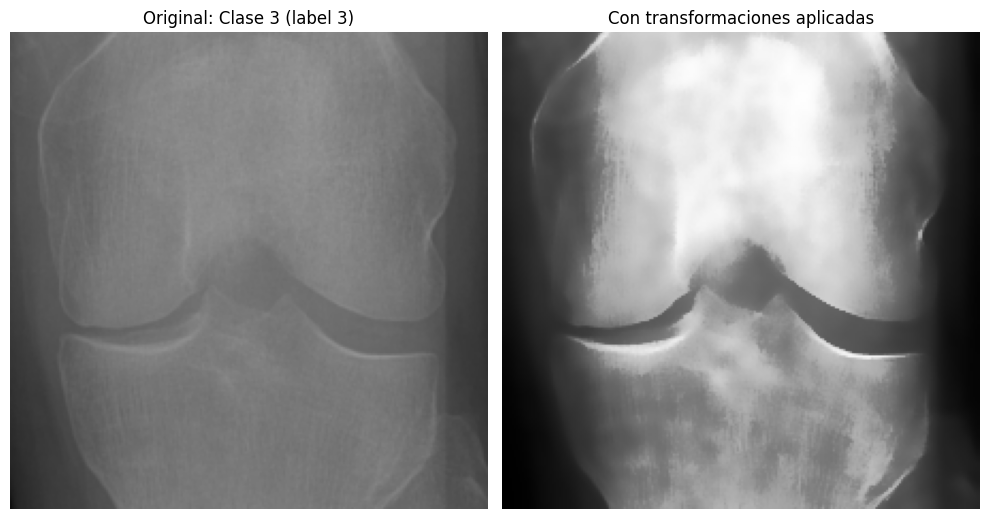

Ruta de la imagen: dataset/experimento1/split_oai\train\3\9000296L.png
Clase: 3 (label 3)
Resolución original: (224, 224)
Resolución después de transformaciones: (224, 224)


In [119]:
dataset = DatasetExperiment1('train', batch_size=32, local = True)
dataset.show_image(10, transformed = True)

In [108]:
dataset.data[0]

('dataset/experimento1/split_oai\\train\\0\\9001695L.png', 0)

## Data augmentation

In [131]:
AUGMENTED_DATASET_PATH = 'dataset/experimento1/augmented_oai'
os.makedirs(AUGMENTED_DATASET_PATH, exist_ok=True)

for split in ['train', 'val', 'test']:
    os.makedirs(os.path.join(AUGMENTED_DATASET_PATH, split), exist_ok=True)
    for kl_grade in os.listdir(ORIGINAL_OAI_PATH):
        os.makedirs(os.path.join(AUGMENTED_DATASET_PATH, split, kl_grade), exist_ok=True)

In [ ]:

# Copy val and test images
for split in ['val', 'test']:
    for kl_grade in os.listdir(ORIGINAL_OAI_PATH):
        kl_grade_path = os.path.join(SPLIT_OAI_PATH, split, kl_grade)
        for image in os.listdir(kl_grade_path):
            image_path = os.path.join(kl_grade_path, image)
            shutil.copy(image_path, os.path.join(AUGMENTED_DATASET_PATH, split, kl_grade, image))


In [132]:
# Data augmentation for train

for split in ['train']:
    for kl_grade in os.listdir(ORIGINAL_OAI_PATH):
        print(f"Augmenting {kl_grade} images")
        kl_grade_path = os.path.join(SPLIT_OAI_PATH, split, kl_grade)
        for image in os.listdir(kl_grade_path):
            image_path = os.path.join(kl_grade_path, image)
            shutil.copy(image_path, os.path.join(AUGMENTED_DATASET_PATH, split, kl_grade, image))
            img = cv2.imread(image_path)
            if img is None:
                print(f"Error al cargar {image_path}")
                continue
            # Flip
            img_flip = cv2.flip(img, 1)
            cv2.imwrite(os.path.join(AUGMENTED_DATASET_PATH, split, kl_grade, f"flip_{image}"), img_flip)
            # Rotate
            img_rot = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
            cv2.imwrite(os.path.join(AUGMENTED_DATASET_PATH, split, kl_grade, f"rot_{image}"), img_rot)
            # Flip + Rotate
            img_flip_rot = cv2.rotate(img_flip, cv2.ROTATE_90_CLOCKWISE)
            cv2.imwrite(os.path.join(AUGMENTED_DATASET_PATH, split, kl_grade, f"flip_rot_{image}"), img_flip_rot)

Augmenting 0 images
Augmenting 1 images
Augmenting 2 images
Augmenting 3 images
Augmenting 4 images


In [133]:
import os

imagenes = {}
for subset in os.listdir(AUGMENTED_DATASET_PATH):
    subset_path = os.path.join(AUGMENTED_DATASET_PATH, subset)
    imagenes[subset] = {}
    for kl_grade in os.listdir(subset_path):
        kl_grade_path = os.path.join(subset_path, kl_grade)
        if kl_grade not in imagenes[subset]:
            imagenes[subset][kl_grade] = 0
        imagenes[subset][kl_grade] += len(os.listdir(kl_grade_path))

# Print total images
total_images = sum(sum(images.values()) for images in imagenes.values())
print(f"Total imagenes: {total_images}")

# Print statistics for each split
for subset, classes in imagenes.items():
    subset_total = sum(classes.values())
    print(f"\n--- {subset.upper()} ---")
    print(f"Total: {subset_total} ({subset_total/total_images*100:.2f}% of dataset)")
    
    for kl_grade, count in sorted(classes.items()):
        print(f"  Clase {kl_grade}: {count} ({count/subset_total*100:.2f}% of {subset})")


Total imagenes: 31797

--- TEST ---
Total: 1669 (5.25% of dataset)
  Clase 0: 657 (39.36% of test)
  Clase 1: 302 (18.09% of test)
  Clase 2: 439 (26.30% of test)
  Clase 3: 220 (13.18% of test)
  Clase 4: 51 (3.06% of test)

--- TRAIN ---
Total: 29348 (92.30% of dataset)
  Clase 0: 11568 (39.42% of train)
  Clase 1: 5308 (18.09% of train)
  Clase 2: 7732 (26.35% of train)
  Clase 3: 3856 (13.14% of train)
  Clase 4: 884 (3.01% of train)

--- VAL ---
Total: 780 (2.45% of dataset)
  Clase 0: 308 (39.49% of val)
  Clase 1: 141 (18.08% of val)
  Clase 2: 206 (26.41% of val)
  Clase 3: 102 (13.08% of val)
  Clase 4: 23 (2.95% of val)


# Train config 1

The hyperparameters of the proposed ensemble model were
tuned by the trial-and-error method. 
L2 regularization, 
batch normalization, 
dropout rate

The Adam optimizer
Epochs = 150. 
The learning rate scheduler and ReduceLROnPlateau were used for handling
the learning rate with an initial value of 0.001. The loss
function used for the model was categorical cross-entropy

In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

from tensorflow.keras.preprocessing.image import ImageDataGenerator # type: ignore

from src.config import *
from src.data import *
from src.models.efficientnet import EfficientNetB5Custom, EfficientNetB0, EfficientNetB5, EfficientNetB7
from src.models.resnet18 import ResNet18_v2
from src.utils import *
from src.data import OriginalOAIDataset, DatasetExperiment1
from src.train import train, train_model, test_model
from src.trainers.classification import Classification, ClassificationAdamax
import wandb
# Set random seeds
torch.manual_seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)
torch.cuda.manual_seed(RANDOM_SEED)

In [3]:
BATCH_SIZE = 40
LEARNING_RATE = 0.001
FACTOR = 0.1
L1 = 0
L2 = 0.001
PATIENCE = 8
BETAS=(0.9, 0.999)
LOCAL = True
# Regularización L1 y L2
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# wandb 254f72e7bdeec44797ba1b2a91ebbc63900b89f4
DATASET_PATH = 'dataset/experimento1/augmented_oai'
train_dataset = DatasetExperiment1('train', batch_size=BATCH_SIZE, local=LOCAL,grey=False, path = DATASET_PATH)
val_dataset = DatasetExperiment1('val', batch_size=BATCH_SIZE, local=LOCAL, grey=False, path = DATASET_PATH)
#model =ResNet18_v2(n_classes = 5)
model = EfficientNetB0(num_classes = 5)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
trainer = ClassificationAdamax(model, device, L1=L1, L2=L2, lr=LEARNING_RATE, factor=FACTOR, patience=PATIENCE, betas=BETAS)

LOCAL MODE ENABLED
LOCAL MODE ENABLED


Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-3dd342df.pth" to C:\Users\34658/.cache\torch\hub\checkpoints\efficientnet_b0_rwightman-3dd342df.pth
100%|██████████| 20.5M/20.5M [00:00<00:00, 21.7MB/s]


Training Epoch [1/10]:   0%|                                                                                                                                                      | 0/1 [00:00<?, ?it/s]

Validation Epoch [10/10]: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.18s/it, AUC=0.339, acc=0.133, specificity=0.783, val_loss=1.74813734]


Epoch 00010: reducing learning rate of group 0 to 1.0000e-04.
Test model EfficientNetB0 - Loss: 1.75, ACC: 0.13, AUC: 0.34, Sensivility: 0.13, Specificity: 0.04


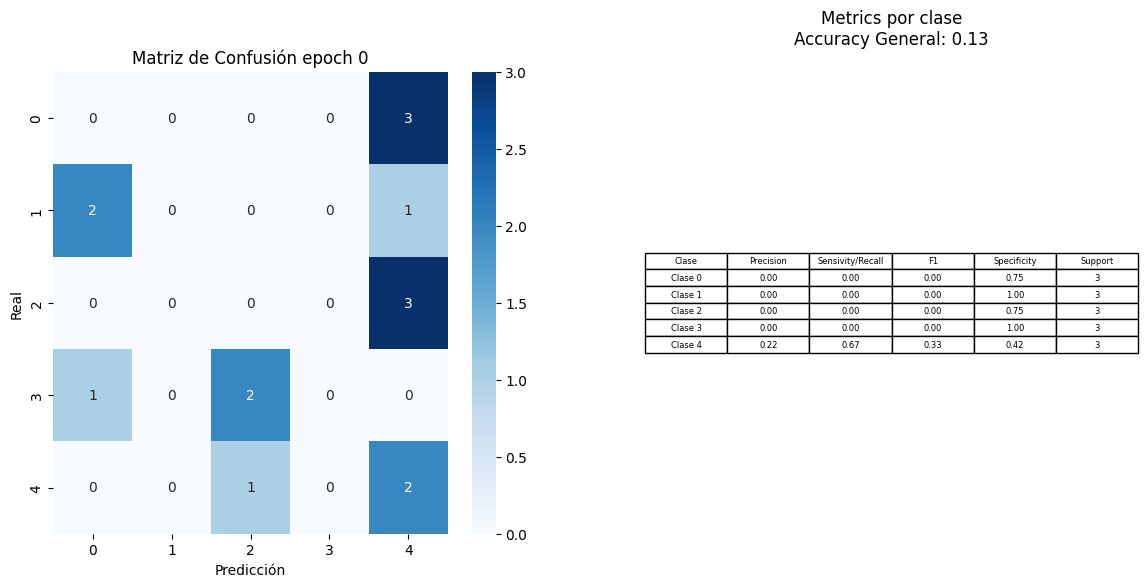

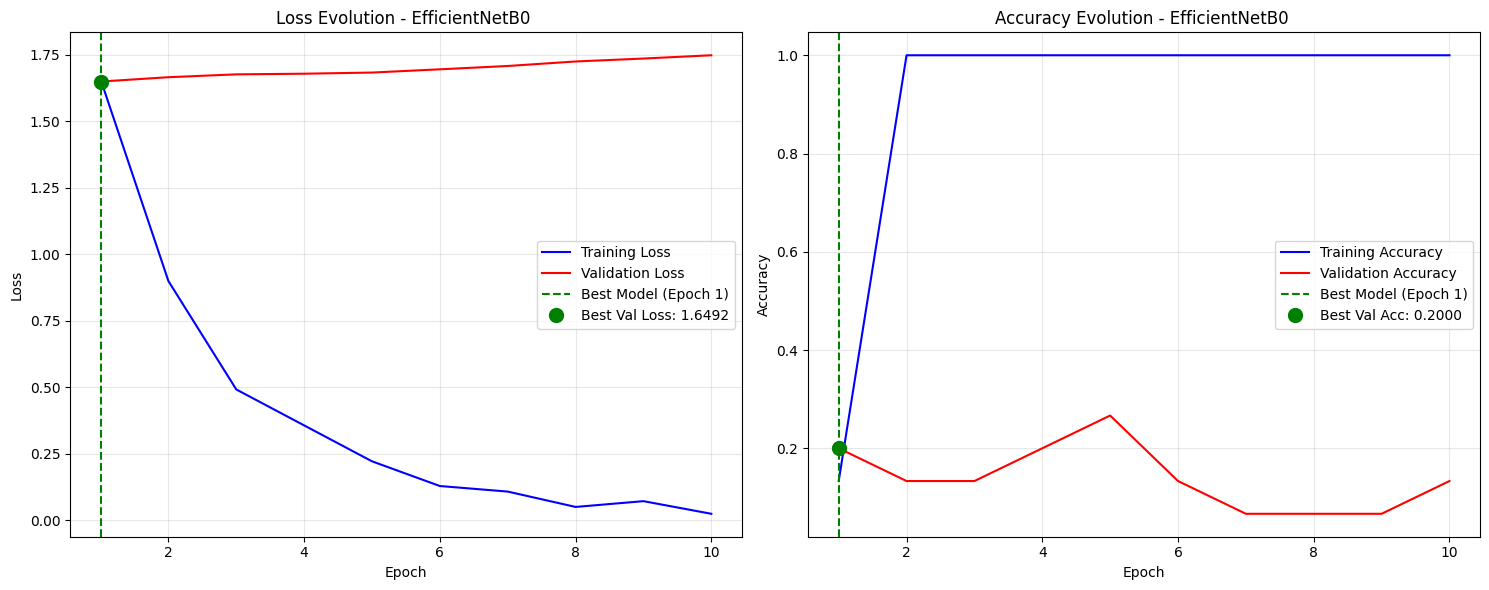

In [4]:
train_model(model, trainer, train_dataset, val_dataset, epochs=10, device=device, save_model = "experimento1.2", name="", wdb=not LOCAL, local=False, early_stopping_patience=12)